<b>Contents:</b>

[1 Load Dataset](#Load-Dataset)

[2  Explore the datasets 2014, 2015 и 2016 years structure](#section_2)

[3  Load all data for 2014 year](#section_3)

[4  Change data type to date and filter dataset](#section_4)

[5  Check file info](#section_5)

[6  Group data to aggregate only trips from 1231 region](#section_6)


In [1]:
import dask.dataframe as dd
from dask.diagnostics import ProgressBar
import numpy as np
import pandas as pd
from scipy import stats
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Asus\Anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Load Dataset

In [2]:
regions=pd.read_csv('regions.csv', sep=(';'))
regions.head()

,region,west,east,south,north
0,1,-74.25559,-74.244478,40.496120,40.504508
1,2,-74.25559,-74.244478,40.504508,40.512896
2,3,-74.25559,-74.244478,40.512896,40.521285
3,4,-74.25559,-74.244478,40.521285,40.529673
4,5,-74.25559,-74.244478,40.529673,40.538061


<a id='section_2'></a>
# Explore the datasets 2014, 2015 и 2016 years structure

## Create data types dictionary from the results of Part_1_data_preprocessing

In [6]:
dtypes = {
 'VendorID': np.uint8,
 'tpep_pickup_datetime': np.str,
 'tpep_dropoff_datetime': np.str,
 'passenger_count': np.uint8,
 'trip_distance': np.float32,
 'pickup_longitude': np.float32,
 'pickup_latitude': np.float32,
 'RatecodeID': np.uint8,
 'store_and_fwd_flag': np.str,
 'dropoff_longitude': np.float32,
 'dropoff_latitude': np.float32,
 'payment_type': np.float64,
 'fare_amount': np.float32,
 'extra': np.float32,
 'mta_tax': np.float32,
 'tip_amount': np.float32,
 'tolls_amount': np.float32,
 'improvement_surcharge': np.float32,
 'total_amount': np.float32,
}

In [7]:
ddf_14_05=dd.read_csv("D:\Asus\Work_DATA\Taxi\Downloads_DATA\Data_14\yellow_tripdata_2014-05.csv", dtype=dtypes)
ddf_14_06=dd.read_csv("D:\Asus\Work_DATA\Taxi\Downloads_DATA\Data_14\yellow_tripdata_2014-06.csv", dtype=dtypes)
ddf_14_07=dd.read_csv("D:\Asus\Work_DATA\Taxi\Downloads_DATA\Data_14\yellow_tripdata_2014-07.csv", dtype=dtypes)
ddf_14_08=dd.read_csv("D:\Asus\Work_DATA\Taxi\Downloads_DATA\Data_14\yellow_tripdata_2014-08.csv", dtype=dtypes)
ddf_14_09=dd.read_csv("D:\Asus\Work_DATA\Taxi\Downloads_DATA\Data_14\yellow_tripdata_2014-09.csv", dtype=dtypes)
ddf_14_10=dd.read_csv("D:\Asus\Work_DATA\Taxi\Downloads_DATA\Data_14\yellow_tripdata_2014-10.csv", dtype=dtypes)
ddf_14_11=dd.read_csv("D:\Asus\Work_DATA\Taxi\Downloads_DATA\Data_14\yellow_tripdata_2014-11.csv", dtype=dtypes)
ddf_14_12=dd.read_csv("D:\Asus\Work_DATA\Taxi\Downloads_DATA\Data_14\yellow_tripdata_2014-12.csv", dtype=dtypes)

ddf_15_01=dd.read_csv("D:\Asus\Work_DATA\Taxi\Downloads_DATA\Data_15\yellow_tripdata_2015-01.csv", dtype=dtypes)
ddf_15_02=dd.read_csv("D:\Asus\Work_DATA\Taxi\Downloads_DATA\Data_15\yellow_tripdata_2015-02.csv", dtype=dtypes)
ddf_15_03=dd.read_csv("D:\Asus\Work_DATA\Taxi\Downloads_DATA\Data_15\yellow_tripdata_2015-03.csv", dtype=dtypes)
ddf_15_04=dd.read_csv("D:\Asus\Work_DATA\Taxi\Downloads_DATA\Data_15\yellow_tripdata_2015-04.csv", dtype=dtypes)
ddf_15_05=dd.read_csv("D:\Asus\Work_DATA\Taxi\Downloads_DATA\Data_15\yellow_tripdata_2015-05.csv", dtype=dtypes)
ddf_15_06=dd.read_csv("D:\Asus\Work_DATA\Taxi\Downloads_DATA\Data_15\yellow_tripdata_2015-06.csv", dtype=dtypes)
ddf_15_07=dd.read_csv("D:\Asus\Work_DATA\Taxi\Downloads_DATA\Data_15\yellow_tripdata_2015-07.csv", dtype=dtypes)
ddf_15_08=dd.read_csv("D:\Asus\Work_DATA\Taxi\Downloads_DATA\Data_15\yellow_tripdata_2015-08.csv", dtype=dtypes)
ddf_15_09=dd.read_csv("D:\Asus\Work_DATA\Taxi\Downloads_DATA\Data_15\yellow_tripdata_2015-09.csv", dtype=dtypes)
ddf_15_10=dd.read_csv("D:\Asus\Work_DATA\Taxi\Downloads_DATA\Data_15\yellow_tripdata_2015-10.csv", dtype=dtypes)
ddf_15_11=dd.read_csv("D:\Asus\Work_DATA\Taxi\Downloads_DATA\Data_15\yellow_tripdata_2015-11.csv", dtype=dtypes)
ddf_15_12=dd.read_csv("D:\Asus\Work_DATA\Taxi\Downloads_DATA\Data_15\yellow_tripdata_2015-12.csv", dtype=dtypes)

ddf_16_01=dd.read_csv("D:\Asus\Work_DATA\Taxi\Downloads_DATA\Data_16\yellow_tripdata_2016-01.csv", dtype=dtypes)
ddf_16_02=dd.read_csv("D:\Asus\Work_DATA\Taxi\Downloads_DATA\Data_16\yellow_tripdata_2016-02.csv", dtype=dtypes)
ddf_16_03=dd.read_csv("D:\Asus\Work_DATA\Taxi\Downloads_DATA\Data_16\yellow_tripdata_2016-03.csv", dtype=dtypes)
ddf_16_04=dd.read_csv("D:\Asus\Work_DATA\Taxi\Downloads_DATA\Data_16\yellow_tripdata_2016-04.csv", dtype=dtypes)
ddf_16_05=dd.read_csv("D:\Asus\Work_DATA\Taxi\Downloads_DATA\Data_16\yellow_tripdata_2016-05.csv", dtype=dtypes)


## Checking common column names  in all datasets

In [9]:
from functools import reduce

columns = [set(ddf_14_05.columns),
    set(ddf_14_06.columns),
    set(ddf_14_07.columns),
    set(ddf_14_08.columns),
    set(ddf_14_09.columns),
    set(ddf_14_10.columns),
    set(ddf_14_11.columns),
    set(ddf_14_12.columns),
    set(ddf_15_01.columns),
    set(ddf_15_02.columns),
    set(ddf_15_03.columns),
    set(ddf_15_04.columns),
    set(ddf_15_05.columns),       
    set(ddf_15_06.columns),
    set(ddf_15_07.columns),
    set(ddf_15_08.columns),
    set(ddf_15_09.columns),
    set(ddf_15_10.columns),
    set(ddf_15_11.columns),
    set(ddf_15_12.columns), 
    set(ddf_16_01.columns),
    set(ddf_16_02.columns),
    set(ddf_16_03.columns),
    set(ddf_16_04.columns),
    set(ddf_16_05.columns)]
common_columns_int = list(reduce(lambda a, i: a.intersection(i), columns))
common_columns_int

[]

No such names

## Check all column names in all dataset sets

In [10]:
common_columns_un = list(reduce(lambda a, i: a.union(i), columns))
common_columns_un

['trip_distance',
 'pickup_latitude',
 'payment_type',
 ' pickup_latitude',
 'VendorID',
 'fare_amount',
 ' total_amount',
 'pickup_longitude',
 'dropoff_latitude',
 ' tip_amount',
 'tip_amount',
 'extra',
 'tolls_amount',
 'RateCodeID',
 'tpep_dropoff_datetime',
 ' dropoff_latitude',
 ' surcharge',
 ' pickup_datetime',
 'mta_tax',
 'RatecodeID',
 ' pickup_longitude',
 ' payment_type',
 'store_and_fwd_flag',
 ' rate_code',
 ' tolls_amount',
 ' passenger_count',
 ' store_and_fwd_flag',
 'vendor_id',
 ' dropoff_longitude',
 'improvement_surcharge',
 'dropoff_longitude',
 'passenger_count',
 'total_amount',
 ' mta_tax',
 ' dropoff_datetime',
 ' trip_distance',
 'tpep_pickup_datetime',
 ' fare_amount']

In [11]:
from IPython.display import display_html
def display_frames(frames, num_spaces=0):
    t_style = '<table style="display: inline;"'
    tables_html = [df.to_html().replace('<table', t_style)
        for df in frames]
    space = '&nbsp;' * num_spaces
    display_html(space.join(tables_html), raw=True)

### Put the column names next to each year and compare

In [16]:
stock_tables = [ddf_14_05.columns.to_frame(),ddf_15_05.columns.to_frame(),ddf_16_05.columns.to_frame()]
display_frames(stock_tables)

,0
vendor_id,vendor_id
pickup_datetime,pickup_datetime
dropoff_datetime,dropoff_datetime
passenger_count,passenger_count
trip_distance,trip_distance
pickup_longitude,pickup_longitude
pickup_latitude,pickup_latitude
rate_code,rate_code
store_and_fwd_flag,store_and_fwd_flag
dropoff_longitude,dropoff_longitude


In [17]:
ddf_15_05.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RateCodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount'],
      dtype='object')

In [18]:
ddf_16_05.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount'],
      dtype='object')

### Delete the columns not found in all datasets

In [20]:
list_1_to_drop_columns=[' surcharge']
list_2_to_drop_columns=['extra', 'improvement_surcharge']

In [21]:
ddf_14_05_raw = ddf_14_05.drop(list_1_to_drop_columns, axis=1)
ddf_15_05_raw = ddf_15_05.drop(list_2_to_drop_columns, axis=1)
ddf_16_05_raw = ddf_16_05.drop(list_2_to_drop_columns, axis=1)

In [22]:
stock_tables = [ddf_14_05_raw.columns.to_frame(),ddf_15_05_raw.columns.to_frame(),ddf_16_05_raw.columns.to_frame()]
display_frames(stock_tables)

,0
vendor_id,vendor_id
pickup_datetime,pickup_datetime
dropoff_datetime,dropoff_datetime
passenger_count,passenger_count
trip_distance,trip_distance
pickup_longitude,pickup_longitude
pickup_latitude,pickup_latitude
rate_code,rate_code
store_and_fwd_flag,store_and_fwd_flag
dropoff_longitude,dropoff_longitude


In [14]:
ddf_14_05.columns

Index(['vendor_id', ' pickup_datetime', ' dropoff_datetime',
       ' passenger_count', ' trip_distance', ' pickup_longitude',
       ' pickup_latitude', ' rate_code', ' store_and_fwd_flag',
       ' dropoff_longitude', ' dropoff_latitude', ' payment_type',
       ' fare_amount', ' surcharge', ' mta_tax', ' tip_amount',
       ' tolls_amount', ' total_amount'],
      dtype='object')

### Create a dictionary for all datasets

In [23]:
dict_to_rename_columns={'vendor_id':'VendorID', ' pickup_datetime':'tpep_pickup_datetime', ' dropoff_datetime':'tpep_dropoff_datetime',
       ' passenger_count':'passenger_count', ' trip_distance':'trip_distance', ' pickup_longitude':'pickup_longitude',
       ' pickup_latitude':'pickup_latitude', ' rate_code':'RatecodeID', ' store_and_fwd_flag':'store_and_fwd_flag',
       ' dropoff_longitude':'dropoff_longitude', ' dropoff_latitude':'dropoff_latitude', ' payment_type':'payment_type', ' fare_amount':'fare_amount',
       ' surcharge':'improvement_surcharge', ' mta_tax':'mta_tax', ' tip_amount':'tip_amount', ' tolls_amount':'tolls_amount',
        ' total_amount':'total_amount'}

<a id='section_3'></a>
# Load all data for 2014 year

In [24]:
raw_data_1=dd.read_csv("D:\Asus\Work_DATA\Taxi\Downloads_DATA\Data_14\*.csv", dtype=dtypes, low_memory=False)
raw_data_1

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
npartitions=441,,,,,,,,,,,,,,,,,,
,object,object,object,int64,float64,float64,float64,int64,object,float64,float64,object,float64,float64,float64,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


## Rename columns

In [27]:
raw_data_3 = raw_data_1.rename(columns=dict_to_rename_columns)
raw_data_3

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,improvement_surcharge,mta_tax,tip_amount,tolls_amount,total_amount
npartitions=441,,,,,,,,,,,,,,,,,,
,object,object,object,int64,float64,float64,float64,int64,object,float64,float64,object,float64,float64,float64,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [28]:
raw_data_2 = raw_data_3[['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag','dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
        'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
        'total_amount' ]]
raw_data_2

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
npartitions=441,,,,,,,,,,,,,,,,,,
,object,object,object,int64,float64,float64,float64,int64,object,float64,float64,object,float64,float64,float64,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


## Show last lines in the dataset

In [30]:
with ProgressBar():
    display(raw_data_2.tail())


[########################################] | 100% Completed |  0.8s


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
134258,CMT,2014-12-26 00:54:43,2014-12-26 00:57:23,1,0.9,-73.987137,40.725023,1,N,-73.979294,40.737183,CRD,5.0,0.5,1.00,0.00,0.5,7.00
134259,CMT,2014-12-26 19:35:43,2014-12-26 19:56:50,1,9.6,-73.971009,40.786091,1,N,-73.861164,40.767864,CRD,28.0,0.5,6.96,5.33,1.0,41.79
134260,CMT,2014-12-25 23:27:36,2014-12-25 23:50:23,1,17.2,-73.789935,40.646843,2,N,-73.990485,40.721082,CRD,52.0,0.5,10.50,0.00,0.0,63.00
134261,CMT,2014-12-25 23:52:17,2014-12-26 00:01:06,1,4.3,-73.955951,40.763726,1,N,-73.987932,40.719160,CRD,13.5,0.5,2.90,0.00,0.5,17.40
134262,CMT,2014-12-26 03:20:07,2014-12-26 04:11:08,3,14.4,-73.986907,40.756391,1,N,-74.035108,40.611715,CRD,47.0,0.5,9.60,0.00,0.5,57.60


## Dealing with missing values

In [32]:
missing_values = raw_data_2.isnull().sum()
with ProgressBar():
    percent_missing = ((missing_values / raw_data_2.index.size) * 100).compute()
percent_missing

[########################################] | 100% Completed |  6min 56.0s


VendorID                  0.000000
tpep_pickup_datetime      0.000000
tpep_dropoff_datetime     0.000000
passenger_count           0.000000
trip_distance             0.000000
pickup_longitude          0.000000
pickup_latitude           0.000000
RatecodeID                0.000000
store_and_fwd_flag       51.070014
dropoff_longitude         0.000088
dropoff_latitude          0.000088
payment_type              0.000000
fare_amount               0.000000
mta_tax                   0.000000
tip_amount                0.000000
tolls_amount              0.000000
improvement_surcharge     0.000000
total_amount              0.000000
dtype: float64

## Delete the column with missing values

In [34]:
columns_to_drop = ['store_and_fwd_flag']
raw_data_4 = raw_data_2.drop(columns_to_drop, axis=1)

<a id='section_4'></a>
# Change data type to date and filter dataset 

Perform the operations:

Set the function of data converting:

 -  Change data type in the time columns to datetime
 - Delete trips with zero time
 - Delete trips with zero passengers
 - Delete trips with zero distance
 - Delete the trips without of Empir State Building region
 - Round the time in the column of the start of the trip to an hour
 - Save everything  to parquet file

In [23]:
def date_transform(raw_data, num_reg):
    # changing data type to datetime
    pickup_date_parsed = raw_data['tpep_pickup_datetime'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'), meta=datetime)
    dropoff_date_parsed = raw_data['tpep_dropoff_datetime'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'), meta=datetime)
    raw_data_stage1 = raw_data.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1)
    raw_data_stage2 = raw_data_stage1.assign(tpep_pickup_datetime=pickup_date_parsed)
    raw_data_stage4 = raw_data_stage2.assign(tpep_dropoff_datetime=dropoff_date_parsed)
    month_year=raw_data_stage4['tpep_pickup_datetime'].apply(lambda dt: dt.strftime("%Y%m"), meta=int)
    raw_data_stage3= raw_data_stage4.assign(month_year=month_year)
    
    data_taxi=raw_data_stage3
    
    ## Time delta = 0
    criteria_1=data_taxi.tpep_pickup_datetime==data_taxi.tpep_dropoff_datetime

    ## Passenger_count = 0
    criteria_2=data_taxi.passenger_count==0
    ## Trip_distance = 0
    criteria_3=data_taxi.trip_distance==0
    ## Pickup coordinates of Empie State Building 
    x_min=regions[regions.region == num_reg].west.values[0]
    x_max=regions[regions.region == num_reg].east.values[0]
    y_min=regions[regions.region == num_reg].south.values[0]
    y_max=regions[regions.region == num_reg].north.values[0]
    interval_y=pd.Interval(left=y_min, right=y_max)
    interval_x=pd.Interval(left=x_min, right=x_max)
    criteria_4=(data_taxi.pickup_longitude.apply((lambda x: x in interval_x), meta=('pickup_longitude', 'bool')) & data_taxi.pickup_latitude.apply((lambda y: y in interval_y), meta=('pickup_latitude', 'bool')))
    ## Combine all the criteria together
    criteria = criteria_1 | criteria_2 | criteria_3 | ~criteria_4 

    data_NY_1=data_taxi[~criteria]
    
    year_hour=data_NY_1['tpep_pickup_datetime'].apply(lambda dt: dt.strftime('%Y-%m-%d %H'), meta=datetime)
    data_NY_2 = data_NY_1.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1)
    data_NY_3= data_NY_2.assign(tpep_pickup_datetime=year_hour)
    datetime_rowid = data_NY_3['tpep_pickup_datetime'].apply(lambda t: pd.to_datetime(t,
    format='%Y-%m-%d %H'), meta=datetime).astype('datetime64[m]')
    data_NY_4 = data_NY_3.drop(['tpep_pickup_datetime'], axis=1)
    data_NY_4.index = datetime_rowid
    data_NY=data_NY_4
    ## save in parquet
    with ProgressBar():
        display(data_NY.head())
        data_NY.to_parquet("D:\Asus\Work_DATA\Taxi\Downloads_DATA\Data_14\dd_temp_14_2", compression='snappy')
    

    

In [24]:
date_transform(raw_data_4, 1231)

[########################################] | 100% Completed | 13.2s


,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month_year
2014-01-09 20:00:00,CMT,1,0.9,-73.983811,40.749655,1,-73.989747,40.756575,CRD,6.0,0.5,1.4,0.0,0.5,8.4,201401
2014-01-09 16:00:00,CMT,1,2.1,-73.988810,40.751013,1,-73.996002,40.726658,CRD,12.5,0.5,3.5,0.0,1.0,17.5,201401
2014-01-09 21:00:00,CMT,1,5.3,-73.980411,40.753945,1,-73.991740,40.691309,CRD,21.0,0.5,4.4,0.0,0.5,26.4,201401
2014-01-09 21:00:00,CMT,2,1.5,-73.987108,40.750221,1,-74.005676,40.740926,CRD,7.0,0.5,1.6,0.0,0.5,9.6,201401
2014-01-09 23:00:00,CMT,1,0.7,-73.978498,40.754932,1,-73.986205,40.762357,CRD,5.5,0.5,1.0,0.0,0.5,7.5,201401


[########################################] | 100% Completed |  3hr 33min 54.4s


In [35]:
data_NY=dd.read_parquet('D:\Asus\Work_DATA\Taxi\Downloads_DATA\Data_14\dd_temp_14_2')

In [36]:
with ProgressBar():
    data_NY_pd=data_NY.compute()
    
    

[########################################] | 100% Completed |  2min  5.7s


<a id='section_5'></a>
# Check file info

In [37]:
data_NY_pd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6963450 entries, 2014-01-09 20:00:00 to 2014-12-25 15:00:00
Data columns (total 16 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               object 
 1   passenger_count        int64  
 2   trip_distance          float64
 3   pickup_longitude       float64
 4   pickup_latitude        float64
 5   RatecodeID             int64  
 6   dropoff_longitude      float64
 7   dropoff_latitude       float64
 8   payment_type           object 
 9   fare_amount            float64
 10  mta_tax                float64
 11  tip_amount             float64
 12  tolls_amount           float64
 13  improvement_surcharge  float64
 14  total_amount           float64
 15  month_year             int64  
dtypes: float64(11), int64(3), object(2)
memory usage: 903.2+ MB


<a id='section_6'></a>
# Group data to aggregate only trips from 1231 region

In [38]:
grouped_index=data_NY_pd.groupby(data_NY_pd.index)['VendorID'].count().to_frame().rename(columns={'VendorID':'Count'})
grouped_index

,Count
index,
2014-01-01 00:00:00,1300
2014-01-01 01:00:00,788
2014-01-01 02:00:00,642
2014-01-01 03:00:00,713
2014-01-01 04:00:00,583
...,...
2014-12-31 19:00:00,997
2014-12-31 20:00:00,986
2014-12-31 21:00:00,900


Text(0, 0.5, 'Trips count')

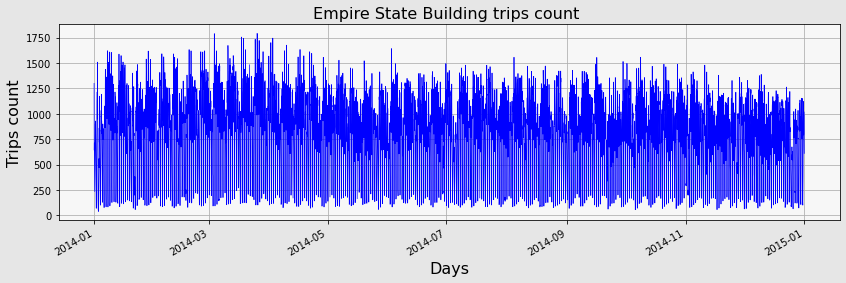

In [39]:
fig, ax = plt.subplots(figsize=(14,4))
fig.set_facecolor('.9')
ax.set_facecolor('.97')
grouped_index.Count.plot(color='b', linewidth=0.7)
ax.grid(axis='both')
plt.title('Empire State Building trips count ', fontsize=16)
plt.xlabel('Days', fontsize=16)
plt.ylabel('Trips count', fontsize=16)

In [40]:
grouped_index.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8759 entries, 2014-01-01 00:00:00 to 2014-12-31 23:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Count   8759 non-null   int64
dtypes: int64(1)
memory usage: 136.9 KB


In [42]:
grouped_index.to_csv('D:\Asus\Work_DATA\Taxi\Downloads_DATA\series_1231\grouped_index_14.csv')
pd.read_csv('D:\Asus\Work_DATA\Taxi\Downloads_DATA\series_1231\grouped_index_14.csv', index_col='index')

,Count
index,
2014-01-01 00:00:00,1300
2014-01-01 01:00:00,788
2014-01-01 02:00:00,642
2014-01-01 03:00:00,713
2014-01-01 04:00:00,583
...,...
2014-12-31 19:00:00,997
2014-12-31 20:00:00,986
2014-12-31 21:00:00,900
